# Load the Totality of the Data

#### The data is quite big here, and all of it cannot be loaded at once with a simple read_csv call. 
**A solution is to specify types, to gain memory (for example switching from float64 to float32)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
print(os.listdir("../input"))

['test.csv', 'train.csv', 'sample_submission.csv']


Here are the types I use. :
- I load objects as categories. 
- Binary values are switched to int8
- Binary values with missing values are switched to float16 (int does not understand nan)
- 64 bits encoding are all switched to 32, or 16 if possible

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
%%time
train_df = pd.read_csv('../input/train.csv', dtype=dtypes)

CPU times: user 2min 40s, sys: 14.7 s, total: 2min 55s
Wall time: 2min 56s


In [4]:
train_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

In [5]:
train_df.shape

(8921483, 83)

In [6]:
to_drop = ['MachineIdentifier']

In [7]:
def DataCleaning(df):
    stats = []
    for col in df.columns:
        stats.append((col, 
                      df[col].nunique(), 
                      df[col].isnull().sum() / train_df.shape[0],
                      df[col].value_counts(normalize=True).values[0],
                      df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Skewness', 'type'])
    return stats_df

In [8]:
stats_df = DataCleaning(train_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Skewness,type
28,PuaMode,2,0.999741,9.991338e-01,category
41,Census_ProcessorClass,3,0.995894,5.709372e-01,category
8,DefaultBrowsersIdentifier,1730,0.951416,1.062574e-01,float16
68,Census_IsFlightingInternal,2,0.830440,9.999861e-01,float16
52,Census_InternalBatteryType,78,0.710468,7.852163e-01,category
71,Census_ThresholdOptIn,2,0.635245,9.997492e-01,float16
75,Census_IsWIMBootEnabled,2,0.634390,9.999997e-01,float16
31,SmartScreen,21,0.356108,7.513629e-01,category
15,OrganizationIdentifier,49,0.308415,6.801428e-01,float16
29,SMode,2,0.060277,9.995371e-01,float16


* Remove columns of which more than 95% are missing values.
* Remove columns of which the biggest category takes up more than 90% of all values.

In [9]:
to_drop.extend(stats_df.loc[stats_df['Percentage of missing values'] > .95]['Feature'].tolist())
to_drop.extend(stats_df.loc[stats_df['Skewness'] > .9]['Feature'].tolist())
to_drop

['MachineIdentifier',
 'DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'ProductName',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductsEnabled',
 'HasTpm',
 'Platform',
 'Processor',
 'OsVer',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_HasOpticalDiskDrive',
 'Census_OSArchitecture',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable']

In [10]:
train_df.drop(to_drop, axis=1, inplace=True)

In [11]:
stats_df = DataCleaning(train_df)
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Skewness,type
32,Census_InternalBatteryType,78,0.710468,0.785216,category
16,SmartScreen,21,0.356108,0.751363,category
7,OrganizationIdentifier,49,0.308415,0.680143,float16
6,CityIdentifier,107366,0.036475,0.011030,float32
51,Wdft_RegionIdentifier,15,0.034014,0.208877,float16
50,Wdft_IsGamer,2,0.034014,0.716421,float16
33,Census_InternalBatteryNumberOfCharges,41087,0.030124,0.584024,float32
46,Census_FirmwareManufacturerIdentifier,712,0.020541,0.308882,float16
47,Census_FirmwareVersionIdentifier,50494,0.017949,0.010228,float32
19,Census_OEMModelIdentifier,175365,0.011459,0.034559,float32


We found that *Census_InternalBatteryType*, *SmartScreen* and *OrganizationIdentifier* still has more than 10% missing values.

In [12]:
pd.options.display.max_rows = 99
train_df.Census_InternalBatteryType.value_counts()

lion        2028256
li-i         245617
#            183998
lip           62099
liio          32635
li p           8383
li             6708
nimh           4614
real           2744
bq20           2302
pbac           2274
vbox           1454
unkn            533
lgi0            399
lipo            198
lhp0            182
4cel            170
lipp             83
ithi             79
batt             60
ram              35
bad              33
virt             33
pad0             22
lit              16
ca48             16
a132             10
ots0              9
lai0              8
ÿÿÿÿ              8
lio               5
4lio              4
lio              4
asmb              4
li-p              4
0x0b              3
lgs0              3
icp3              3
3ion              2
a140              2
h00j              2
5nm1              2
lhpo              2
a138              2
lilo              1
li-h              1
lp                1
li?               1
ion              1
pbso              1


In [13]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train_df.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [14]:
train_df.Census_InternalBatteryType.isnull().sum()

0

In [15]:
train_df.SmartScreen.value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
requireAdmin          1
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

In [16]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist'
}
train_df.replace({'SmartScreen': trans_dict}, inplace=True)

In [17]:
train_df.SmartScreen.isnull().sum()

0

In [18]:
train_df.OrganizationIdentifier.value_counts()

27.0    4196457
18.0    1764175
48.0      63845
50.0      45502
11.0      19436
37.0      19398
49.0      13627
46.0      10974
14.0       4713
32.0       4045
36.0       3909
52.0       3043
33.0       2896
2.0        2595
5.0        1990
40.0       1648
28.0       1591
4.0        1385
10.0       1083
51.0        917
20.0        915
1.0         893
8.0         723
22.0        418
39.0        413
6.0         412
31.0        398
21.0        397
47.0        385
3.0         331
16.0        242
19.0        172
26.0        160
44.0        150
29.0        135
42.0        132
7.0          98
41.0         77
45.0         73
30.0         64
43.0         60
35.0         32
23.0         20
15.0         13
25.0         12
12.0          7
34.0          2
38.0          1
17.0          1
Name: OrganizationIdentifier, dtype: int64

In [19]:
train_df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [20]:
train_df.OrganizationIdentifier.isnull().sum()

0

In [21]:
train_df.shape

(8921483, 53)

In [22]:
train_df.dropna(inplace=True)
train_df.shape

(7730792, 53)

Remove the columns that have high correlation with other columns.

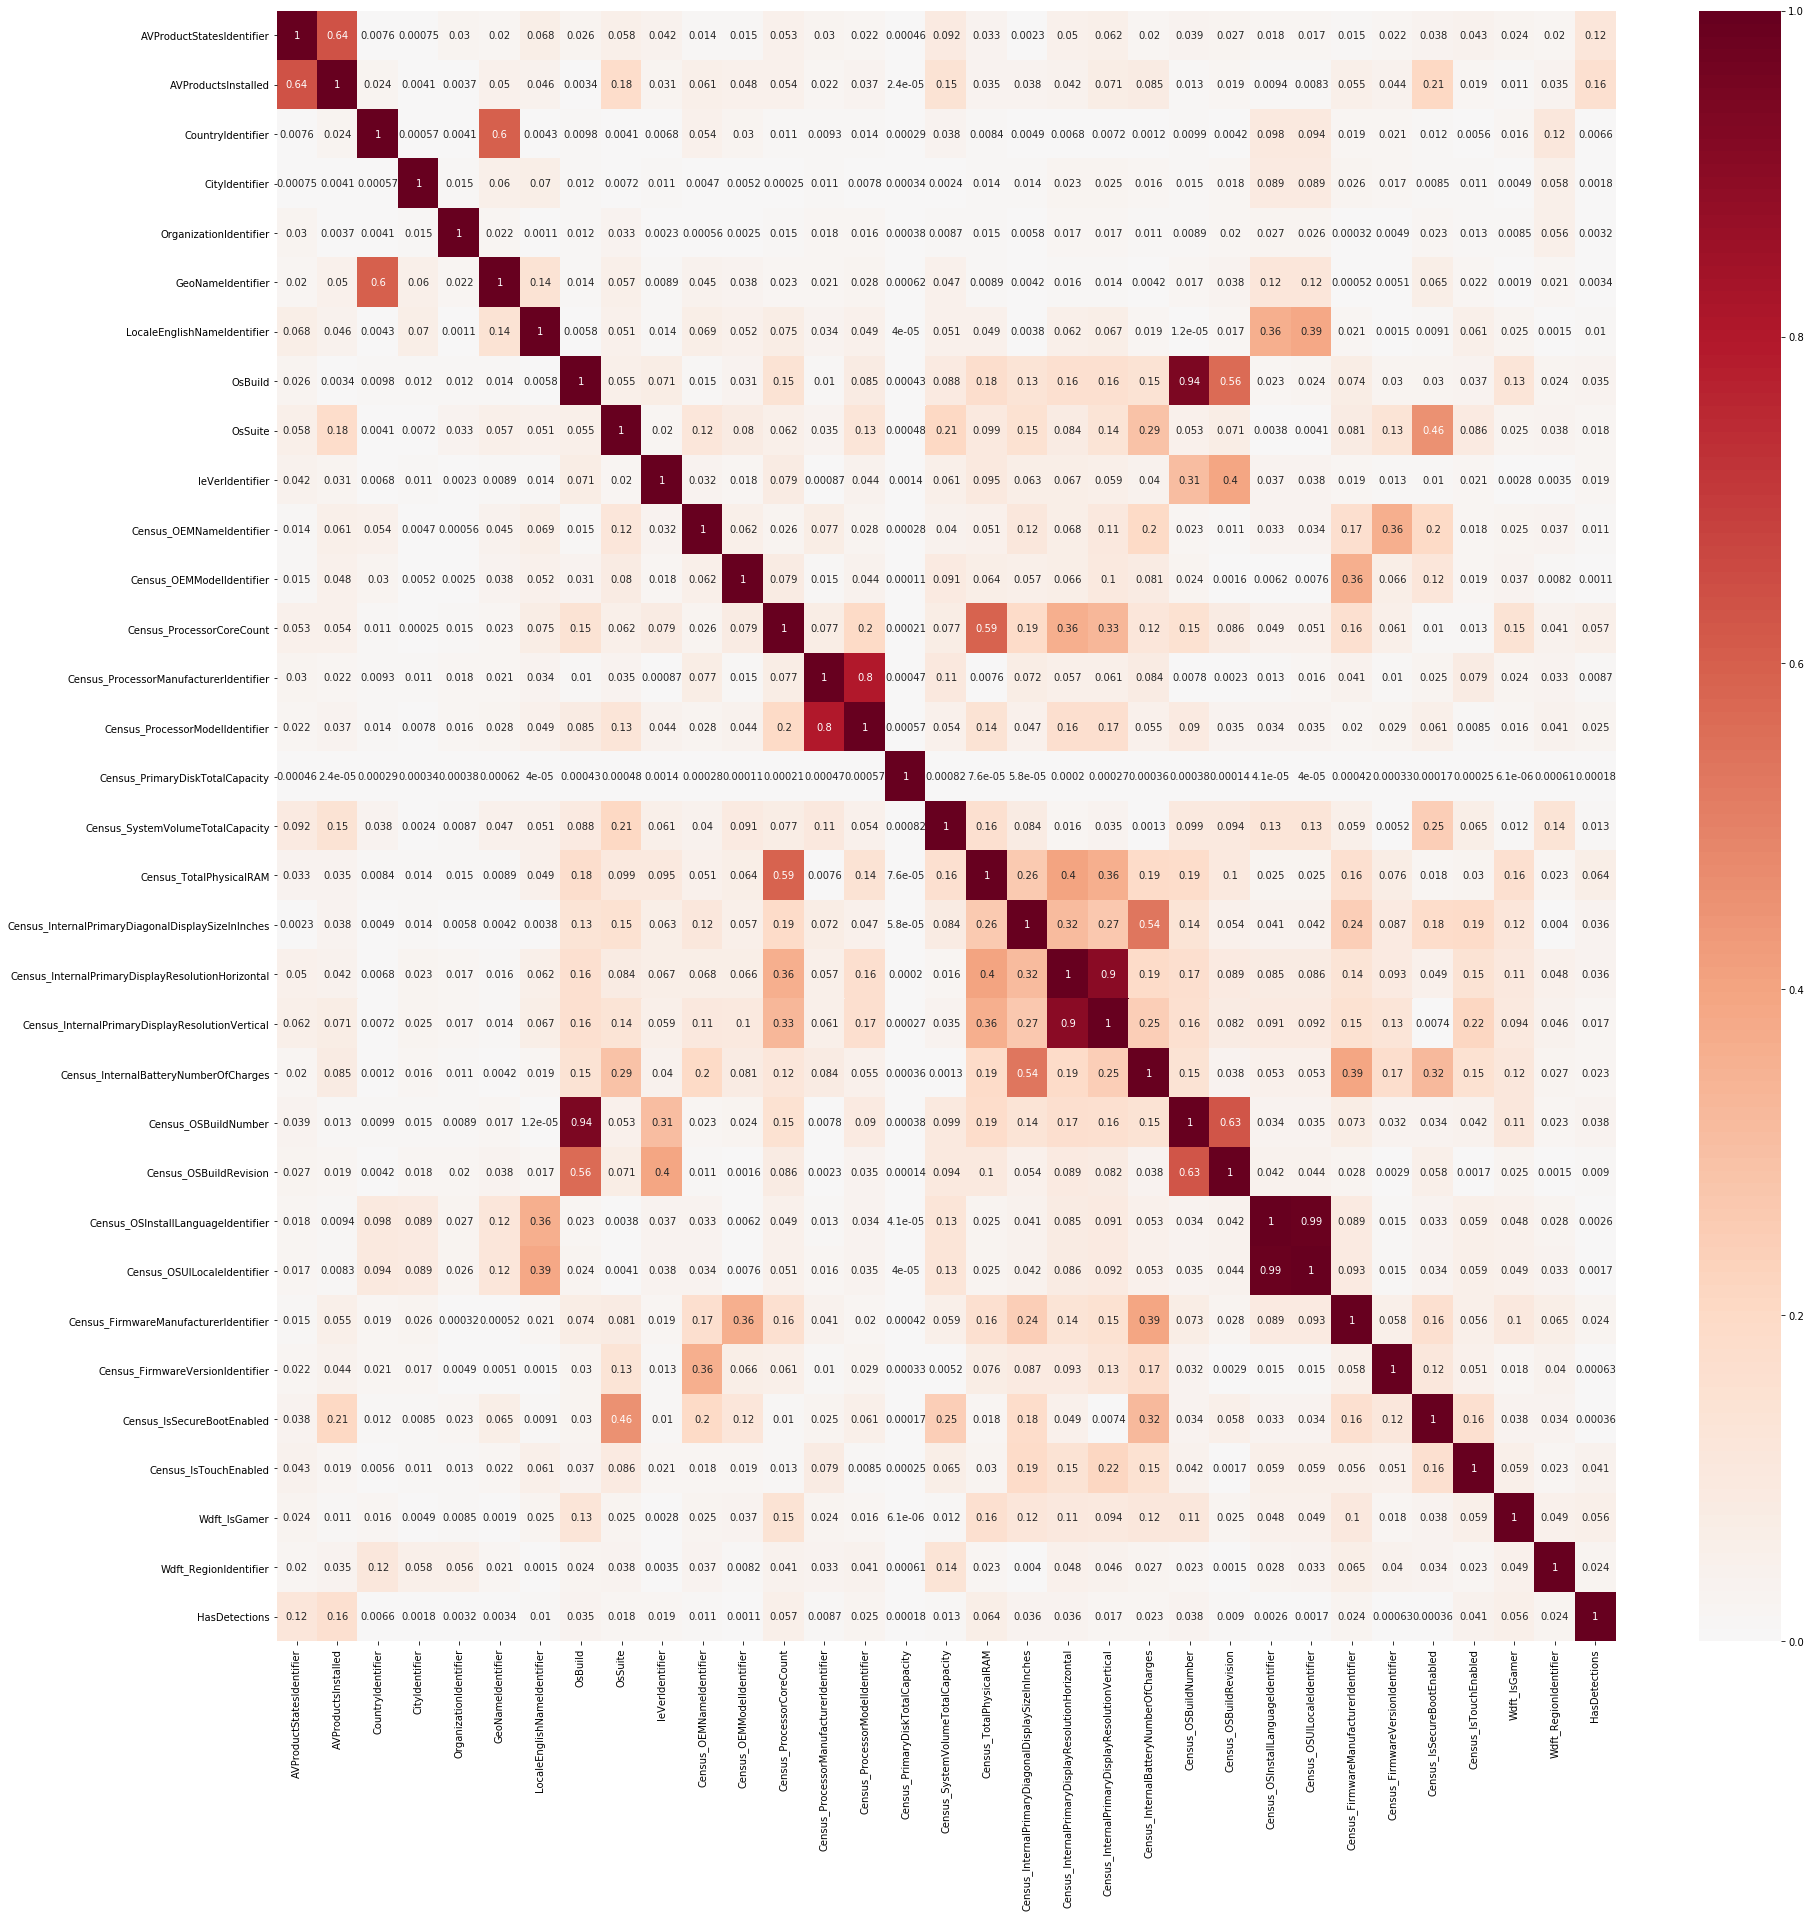

In [23]:
cols = train_df.columns.tolist()
plt.figure(figsize=(30,30))
sns.heatmap(train_df[cols].corr().abs(), cmap='RdBu_r', annot=True, center=0.0)
plt.show()

In [24]:
'EngineVersion' in train_df

True

In [25]:
corr_matrix = train_df.corr()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations:")
print(get_top_abs_correlations(corr_matrix, 10))

Top Absolute Correlations:
Census_OSInstallLanguageIdentifier                 Census_OSUILocaleIdentifier                        0.999816
Census_InternalPrimaryDisplayResolutionHorizontal  Census_InternalPrimaryDisplayResolutionVertical    0.988960
OsBuild                                            Census_OSBuildNumber                               0.985963
Census_ProcessorManufacturerIdentifier             Census_ProcessorModelIdentifier                    0.935849
AVProductStatesIdentifier                          AVProductsInstalled                                0.897443
Census_OSBuildNumber                               Census_OSBuildRevision                             0.895790
Census_ProcessorCoreCount                          Census_TotalPhysicalRAM                            0.878429
Census_InternalPrimaryDiagonalDisplaySizeInInches  Census_InternalBatteryNumberOfCharges              0.851716
OsBuild                                            Census_OSBuildRevision            

In [26]:
train_df.shape

(7730792, 53)

In [27]:
to_drop = []
if train_df.Census_OSInstallLanguageIdentifier.nunique() > train_df.Census_OSUILocaleIdentifier.nunique():
    to_drop.append('Census_OSInstallLanguageIdentifier')
else:
    to_drop.append('Census_OSUILocaleIdentifier')
if train_df.Census_InternalPrimaryDisplayResolutionHorizontal.nunique() > train_df.Census_InternalPrimaryDisplayResolutionVertical.nunique():
    to_drop.append('Census_InternalPrimaryDisplayResolutionHorizontal')
else:
    to_drop.append('Census_InternalPrimaryDisplayResolutionVertical')
if train_df.OsBuild.nunique() > train_df.Census_OSBuildNumber.nunique():
    to_drop.append('OsBuild')
else:
    to_drop.append('Census_OSBuildNumber')
if train_df.Census_ProcessorManufacturerIdentifier.nunique() > train_df.Census_ProcessorModelIdentifier.nunique():
    to_drop.append('Census_ProcessorManufacturerIdentifier')
else:
    to_drop.append('Census_ProcessorModelIdentifier')
if train_df.AVProductStatesIdentifier.nunique() > train_df.Census_ProcessorModelIdentifier.nunique():
    to_drop.append('AVProductStatesIdentifier')
else:
    to_drop.append('Census_ProcessorModelIdentifier')
if train_df.Census_ProcessorManufacturerIdentifier.nunique() > train_df.Census_ProcessorModelIdentifier.nunique():
    to_drop.append('Census_ProcessorManufacturerIdentifier')
else:
    to_drop.append('Census_ProcessorModelIdentifier')
if train_df.Census_ProcessorManufacturerIdentifier.nunique() > train_df.Census_ProcessorModelIdentifier.nunique():
    to_drop.append('Census_ProcessorManufacturerIdentifier')
else:
    to_drop.append('Census_ProcessorModelIdentifier')
if train_df.Census_ProcessorManufacturerIdentifier.nunique() > train_df.Census_ProcessorModelIdentifier.nunique():
    to_drop.append('Census_ProcessorManufacturerIdentifier')
else:
    to_drop.append('Census_ProcessorModelIdentifier')

In [28]:
train_df.drop(to_drop, axis=1, inplace=True)
train_df.shape

(7730792, 48)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7730792 entries, 0 to 8921482
Data columns (total 48 columns):
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
AVProductsInstalled                                  float16
CountryIdentifier                                    int16
CityIdentifier                                       float32
OrganizationIdentifier                               float16
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                          int8
OsBuild                                              int16
OsSuite                                              int16
OsPlatformSubRelease                                 category
OsBuildLab                                           category
SkuEdition                                           category
IeVerIdentifier                     

In [30]:
import math

# CHECK FOR NAN
def nan_check(x):
    if isinstance(x,float):
        if math.isnan(x):
            return True
    return False

# FREQUENCY ENCODING
def encode_FE(df,col,verbose=1):
    d = df[col].value_counts(dropna=False)
    n = col+"_FE"
    df[n] = df[col].map(d)/d.max()
    if verbose==1:
        print('FE encoded',col)
    return [n]

# ONE-HOT-ENCODE ALL CATEGORY VALUES THAT COMPRISE MORE THAN
# "FILTER" PERCENT OF TOTAL DATA AND HAS SIGNIFICANCE GREATER THAN "ZVALUE"
def encode_OHE(df, col, filter, zvalue, tar='HasDetections', m=0.5, verbose=1):
    cv = df[col].value_counts(dropna=False)
    cvd = cv.to_dict()
    vals = len(cv)
    th = filter * len(df)
    sd = zvalue * 0.5/ math.sqrt(th)
    #print(sd)
    n = []; ct = 0; d = {}
    for x in cv.index:
        try:
            if cv[x]<th: break
            sd = zvalue * 0.5/ math.sqrt(cv[x])
        except:
            if cvd[x]<th: break
            sd = zvalue * 0.5/ math.sqrt(cvd[x])
        if nan_check(x): r = df[df[col].isna()][tar].mean()
        else: r = df[df[col]==x][tar].mean()
        if abs(r-m)>sd:
            nm = col+'_BE_'+str(x)
            if nan_check(x): df[nm] = (df[col].isna()).astype('int8')
            else: df[nm] = (df[col]==x).astype('int8')
            n.append(nm)
            d[x] = 1
        ct += 1
        if (ct+1)>=vals: break
    if verbose==1:
        print('OHE encoded',col,'- Created',len(d),'booleans')
    return [n,d]

# ONE-HOT-ENCODING from dictionary
def encode_OHE_test(df,col,dt):
    n = []
    for x in dt: 
        n += encode_BE(df,col,x)
    return n

# BOOLEAN ENCODING
def encode_BE(df,col,val):
    n = col+"_BE_"+str(val)
    if nan_check(val):
        df[n] = df[col].isna()
    else:
        df[n] = df[col]==val
    df[n] = df[n].astype('int8')
    return [n]

In [54]:
# LOAD AND FREQUENCY-ENCODE
FE = ['EngineVersion','AppVersion','AvSigVersion','Census_OSVersion']
# LOAD AND ONE-HOT-ENCODE
OHE = [ 'OsPlatformSubRelease','OsBuildLab','SkuEdition','SmartScreen','Census_MDC2FormFactor','Census_PrimaryDiskTypeName','Census_ChassisTypeName','Census_PowerPlatformRoleName',
      'Census_InternalBatteryType','Census_OSBranch','Census_OSEdition','Census_OSSkuName','Census_OSInstallTypeName','Census_OSWUAutoUpdateOptionsName','Census_GenuineStateName',
      'Census_ActivationChannel']

In [53]:
samples = train_df.sample(50000,random_state=42)

In [55]:
cols = []; dd = []

# ENCODE NEW
for x in FE:
    cols += encode_FE(samples,x)
for x in OHE:
    tmp = encode_OHE(samples,x,0.005,5)
    cols += tmp[0]; dd.append(tmp[1])
print('Encoded',len(cols),'new variables')

# REMOVE OLD
for x in FE+OHE:
    del samples[x]
print('Removed original',len(FE+OHE),'variables')

FE encoded EngineVersion
FE encoded AppVersion
FE encoded AvSigVersion
FE encoded Census_OSVersion
OHE encoded OsPlatformSubRelease - Created 2 booleans
OHE encoded OsBuildLab - Created 4 booleans
OHE encoded SkuEdition - Created 0 booleans
OHE encoded SmartScreen - Created 3 booleans
OHE encoded Census_MDC2FormFactor - Created 3 booleans
OHE encoded Census_PrimaryDiskTypeName - Created 0 booleans
OHE encoded Census_ChassisTypeName - Created 2 booleans
OHE encoded Census_PowerPlatformRoleName - Created 2 booleans
OHE encoded Census_InternalBatteryType - Created 0 booleans
OHE encoded Census_OSBranch - Created 3 booleans
OHE encoded Census_OSEdition - Created 2 booleans
OHE encoded Census_OSSkuName - Created 2 booleans
OHE encoded Census_OSInstallTypeName - Created 1 booleans
OHE encoded Census_OSWUAutoUpdateOptionsName - Created 1 booleans
OHE encoded Census_GenuineStateName - Created 0 booleans
OHE encoded Census_ActivationChannel - Created 1 booleans
Encoded 30 new variables
Removed 

In [57]:
samples

,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_FE,AppVersion_FE,AvSigVersion_FE,Census_OSVersion_FE,OsPlatformSubRelease_BE_rs4,OsPlatformSubRelease_BE_rs1,OsBuildLab_BE_17134.1.amd64fre.rs4_release.180410-1804,OsBuildLab_BE_17134.1.x86fre.rs4_release.180410-1804,OsBuildLab_BE_16299.15.x86fre.rs3_release.170928-1534,OsBuildLab_BE_15063.0.x86fre.rs2_release.170317-1834,SmartScreen_BE_RequireAdmin,SmartScreen_BE_ExistsNotSet,SmartScreen_BE_Warn,Census_MDC2FormFactor_BE_Desktop,Census_MDC2FormFactor_BE_Detachable,Census_MDC2FormFactor_BE_LargeTablet,Census_ChassisTypeName_BE_Desktop,Census_ChassisTypeName_BE_HandHeld,Census_PowerPlatformRoleName_BE_Desktop,Census_PowerPlatformRoleName_BE_Slate,Census_OSBranch_BE_rs4_release,Census_OSBranch_BE_rs3_release,Census_OSBranch_BE_rs1_release,Census_OSEdition_BE_Core,Census_OSEdition_BE_CoreSingleLanguage,Census_OSSkuName_BE_CORE,Census_OSSkuName_BE_CORE_SINGLELANGUAGE,Census_OSInstallTypeName_BE_UUPUpgrade,Census_OSWUAutoUpdateOptionsName_BE_FullAuto,Census_ActivationChannel_BE_Volume:GVLK
1561037,1.0,29,32422.0,18.0,35.0,-85,17134,768,137.0,585.0,189460.0,4.0,5.0,953869.0,953251.0,4096.0,15.500000,768.0,0.000000e+00,165,26.0,556.0,63408.0,1,0,1.0,10.0,1,1.000000,1.000000,0.514238,0.659496,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
3942891,1.0,89,66953.0,27.0,277.0,75,16299,256,111.0,585.0,189313.0,2.0,1.0,476940.0,149391.0,2048.0,13.898438,768.0,0.000000e+00,192,8.0,556.0,64570.0,0,0,0.0,1.0,1,0.992623,1.000000,0.139028,0.071051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6098332,1.0,93,13354.0,52.0,277.0,75,17134,768,137.0,1443.0,256569.0,4.0,5.0,953869.0,477222.0,4096.0,23.796875,1080.0,4.294967e+09,285,8.0,355.0,9244.0,0,0,1.0,8.0,1,0.992623,1.000000,0.698492,0.331776,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
7171142,2.0,44,16668.0,27.0,57.0,-38,17134,768,137.0,2102.0,98256.0,4.0,5.0,953869.0,940811.0,4096.0,21.500000,1080.0,4.294967e+09,165,10.0,93.0,33103.0,1,0,0.0,10.0,1,1.000000,1.000000,0.072027,0.659496,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0
5349364,2.0,107,52052.0,27.0,138.0,-122,17134,768,137.0,2668.0,171449.0,8.0,5.0,122104.0,120827.0,8192.0,15.500000,1080.0,0.000000e+00,137,20.0,628.0,12198.0,1,0,0.0,1.0,1,0.992623,0.171256,0.231156,0.057406,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
5249980,1.0,169,1035.0,0.0,209.0,75,17134,768,137.0,1443.0,256588.0,4.0,5.0,476940.0,99385.0,4096.0,15.500000,768.0,0.000000e+00,165,8.0,355.0,20050.0,0,0,1.0,3.0,0,1.000000,0.171256,0.026801,0.659496,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4277503,1.0,205,75528.0,0.0,274.0,-3,16299,256,111.0,4588.0,276863.0,2.0,5.0,715404.0,79502.0,4096.0,21.500000,1080.0,4.294967e+09,309,36.0,142.0,3104.0,0,0,1.0,3.0,1,0.011981,0.023451,0.001675,0.104364,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
248000,2.0,158,109343.0,0.0,202.0,70,16299,768,117.0,1443.0,256477.0,2.0,5.0,476940.0,465291.0,4096.0,15.296875,768.0,0.000000e+00,371,8.0,355.0,11517.0,1,0,0.0,1.0,1,1.000000,0.171256,0.139028,0.234419,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
1561724,1.0,203,143782.0,18.0,255.0,46,17134,768,137.0,525.0,331096.0,4.0,5.0,122104.0,120750.0,4096.0,13.898438,768.0,0.000000e+00,228,39.0,142.0,69498.0,1,0,0.0,7.0,0,0.992623,1.000000,0.061977,1.000000,1,0,1,0,0,0,1,0

In [58]:
from sklearn.model_selection import KFold

In [59]:
kf = KFold(n_splits=5,random_state=5,shuffle=True)

In [60]:
samples = samples.reset_index().drop(columns='index')

In [61]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
samples

,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,EngineVersion_FE,AppVersion_FE,AvSigVersion_FE,Census_OSVersion_FE,OsPlatformSubRelease_BE_rs4,OsPlatformSubRelease_BE_rs1,OsBuildLab_BE_17134.1.amd64fre.rs4_release.180410-1804,OsBuildLab_BE_17134.1.x86fre.rs4_release.180410-1804,OsBuildLab_BE_16299.15.x86fre.rs3_release.170928-1534,OsBuildLab_BE_15063.0.x86fre.rs2_release.170317-1834,SmartScreen_BE_RequireAdmin,SmartScreen_BE_ExistsNotSet,SmartScreen_BE_Warn,Census_MDC2FormFactor_BE_Desktop,Census_MDC2FormFactor_BE_Detachable,Census_MDC2FormFactor_BE_LargeTablet,Census_ChassisTypeName_BE_Desktop,Census_ChassisTypeName_BE_HandHeld,Census_PowerPlatformRoleName_BE_Desktop,Census_PowerPlatformRoleName_BE_Slate,Census_OSBranch_BE_rs4_release,Census_OSBranch_BE_rs3_release,Census_OSBranch_BE_rs1_release,Census_OSEdition_BE_Core,Census_OSEdition_BE_CoreSingleLanguage,Census_OSSkuName_BE_CORE,Census_OSSkuName_BE_CORE_SINGLELANGUAGE,Census_OSInstallTypeName_BE_UUPUpgrade,Census_OSWUAutoUpdateOptionsName_BE_FullAuto,Census_ActivationChannel_BE_Volume:GVLK
0,1.0,29,32422.0,18.0,35.0,-85,17134,768,137.0,585.0,189460.0,4.0,5.0,953869.0,953251.0,4096.0,15.500000,768.0,0.000000e+00,165,26.0,556.0,63408.0,1,0,1.0,10.0,1,1.000000,1.000000,0.514238,0.659496,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
1,1.0,89,66953.0,27.0,277.0,75,16299,256,111.0,585.0,189313.0,2.0,1.0,476940.0,149391.0,2048.0,13.898438,768.0,0.000000e+00,192,8.0,556.0,64570.0,0,0,0.0,1.0,1,0.992623,1.000000,0.139028,0.071051,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1.0,93,13354.0,52.0,277.0,75,17134,768,137.0,1443.0,256569.0,4.0,5.0,953869.0,477222.0,4096.0,23.796875,1080.0,4.294967e+09,285,8.0,355.0,9244.0,0,0,1.0,8.0,1,0.992623,1.000000,0.698492,0.331776,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0
3,2.0,44,16668.0,27.0,57.0,-38,17134,768,137.0,2102.0,98256.0,4.0,5.0,953869.0,940811.0,4096.0,21.500000,1080.0,4.294967e+09,165,10.0,93.0,33103.0,1,0,0.0,10.0,1,1.000000,1.000000,0.072027,0.659496,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0
4,2.0,107,52052.0,27.0,138.0,-122,17134,768,137.0,2668.0,171449.0,8.0,5.0,122104.0,120827.0,8192.0,15.500000,1080.0,0.000000e+00,137,20.0,628.0,12198.0,1,0,0.0,1.0,1,0.992623,0.171256,0.231156,0.057406,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
5,1.0,169,1035.0,0.0,209.0,75,17134,768,137.0,1443.0,256588.0,4.0,5.0,476940.0,99385.0,4096.0,15.500000,768.0,0.000000e+00,165,8.0,355.0,20050.0,0,0,1.0,3.0,0,1.000000,0.171256,0.026801,0.659496,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
6,1.0,205,75528.0,0.0,274.0,-3,16299,256,111.0,4588.0,276863.0,2.0,5.0,715404.0,79502.0,4096.0,21.500000,1080.0,4.294967e+09,309,36.0,142.0,3104.0,0,0,1.0,3.0,1,0.011981,0.023451,0.001675,0.104364,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
7,2.0,158,109343.0,0.0,202.0,70,16299,768,117.0,1443.0,256477.0,2.0,5.0,476940.0,465291.0,4096.0,15.296875,768.0,0.000000e+00,371,8.0,355.0,11517.0,1,0,0.0,1.0,1,1.000000,0.171256,0.139028,0.234419,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
8,1.0,203,143782.0,18.0,255.0,46,17134,768,137.0,525.0,331096.0,4.0,5.0,122104.0,120750.0,4096.0,13.898438,768.0,0.000000e+00,228,39.0,142.0,69498.0,1,0,0.0,7.0,0,0.992623,1.000000,0.061977,1.000000,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
9,2.0,122,25179.

In [65]:
auc = []
for train_index,test_index in kf.split(samples):
    X_train = samples.iloc[train_index].drop(columns='HasDetections')    
    y_train = samples.iloc[train_index].HasDetections
    X_test = samples.iloc[test_index].drop(columns='HasDetections')    
    y_test = samples.iloc[test_index].HasDetections        
    xgb = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=180, silent=True)
    xgb.fit(X_train,y_train)
    predictions = xgb.predict(X_test)
    auc.append(roc_auc_score(y_test,predictions))
print (auc)

[0.6437944230071078, 0.6422559339019658, 0.6361256785382285, 0.6302950295029504, 0.6386184715821813]


In [68]:
print(np.mean(auc))

0.6382179073064868
